In [1]:
import pandas as pd


movies_df = pd.read_csv('tmdb_5000_movies.csv')


In [3]:

movies_df = movies_df.dropna()

# Remove duplicates
movies_df = movies_df.drop_duplicates()

# Convert release_date to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])


In [5]:
genre_popularity = movies_df['genres'].apply(lambda x: [genre['name'] for genre in eval(x)]).explode().value_counts()


In [7]:
movies_df['vote_average'] = movies_df['vote_average'].astype(float)
movies_df['genres'] = movies_df['genres'].apply(lambda x: [genre['name'] for genre in eval(x)])
average_ratings = movies_df.explode('genres').groupby('genres')['vote_average'].mean()


In [9]:
movies_df['release_year'] = movies_df['release_date'].dt.year
revenue_trends = movies_df.groupby('release_year')['revenue'].mean()


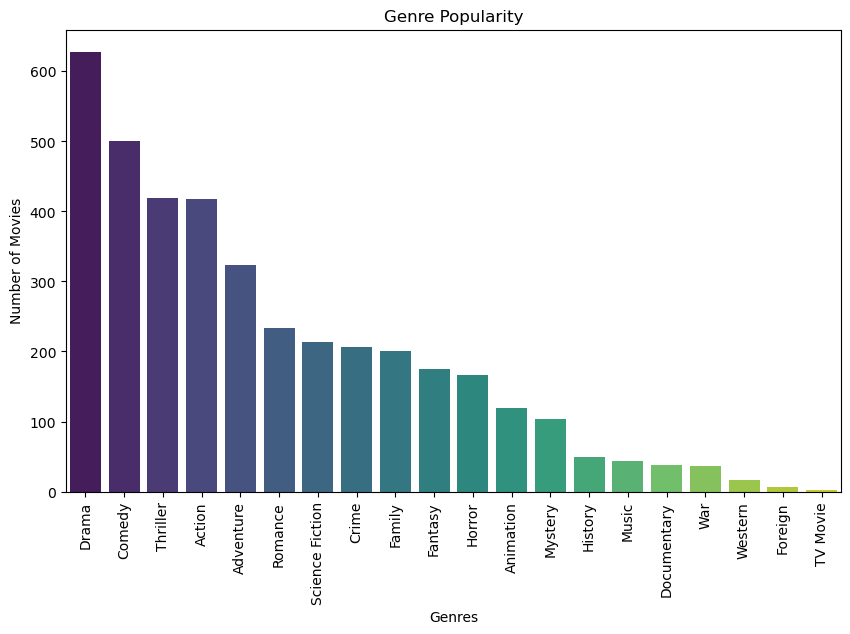

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')
plt.title('Genre Popularity')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


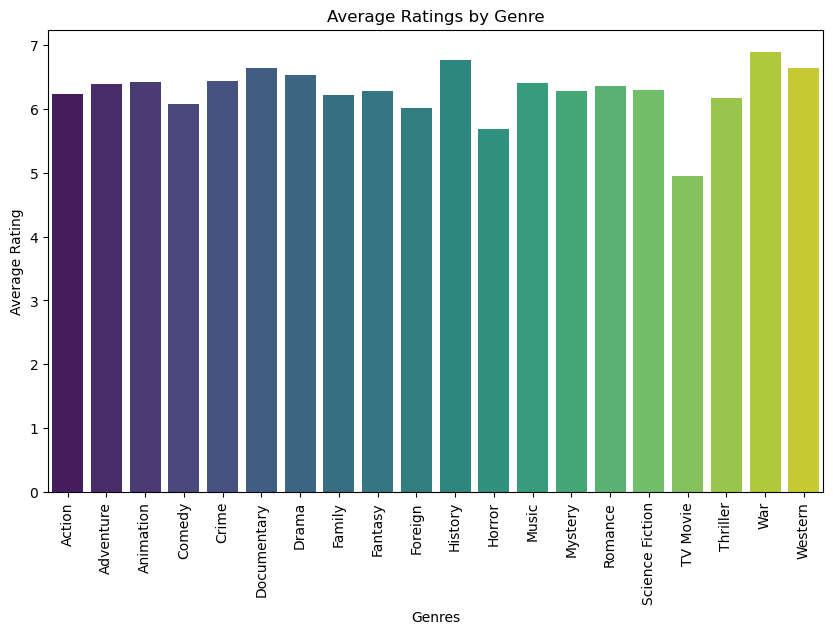

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=average_ratings.index, y=average_ratings.values, palette='viridis')
plt.title('Average Ratings by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


C:\Users\lohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


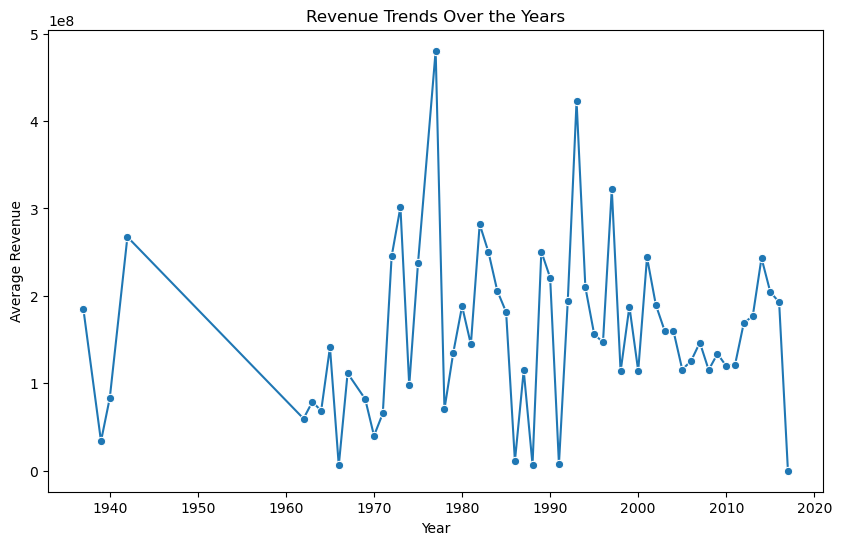

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(x=revenue_trends.index, y=revenue_trends.values, marker='o')
plt.title('Revenue Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.show()


Correlation between budget and revenue: 0.74


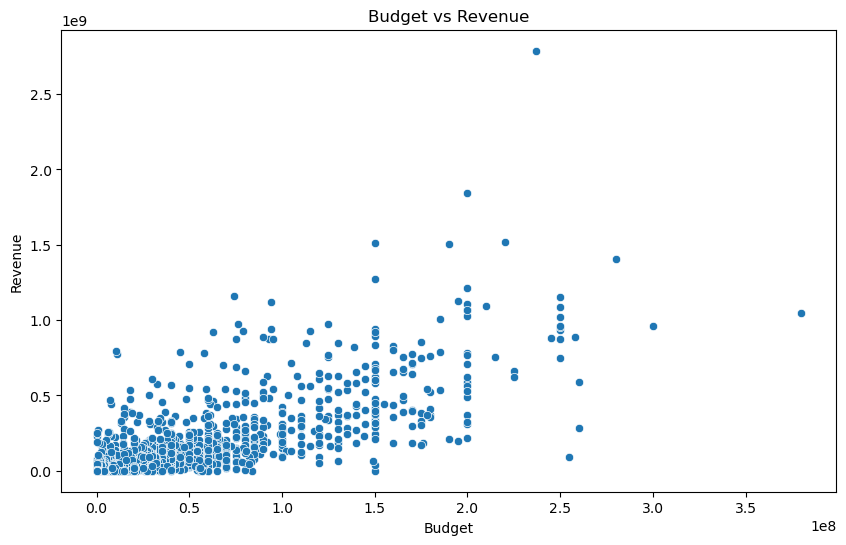

In [17]:
import numpy as np

# Calculate correlation
correlation = movies_df['budget'].corr(movies_df['revenue'])
print(f'Correlation between budget and revenue: {correlation:.2f}')

# Scatter plot of budget vs revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x=movies_df['budget'], y=movies_df['revenue'])
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()
